In [32]:
import numpy as np
import matplotlib.pyplot as plt
from pygmid import Lookup as lk

In [33]:
choice = 0  #start from 0
devices = ['nfet_01v8_lvt', 'nfet_01v8', 'pfet_01v8_lvt', 'pfet_01v8']
fet = lk('./simulation/'+devices[choice]+'.mat')

In [34]:
# sweep variable vectors
l = fet['L']
vgs = fet['VGS']
vds = fet['VDS']
vsb = fet['VSB']

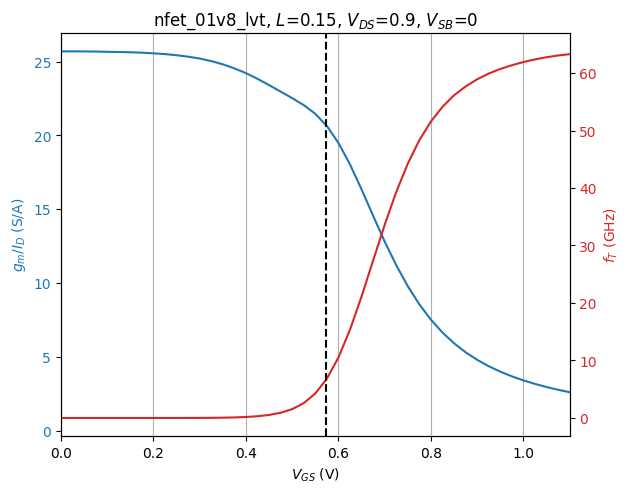

In [35]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=0.9; VSB1=0
gm_id1 = fet.lookup('GM_ID', L=L1, VDS=VDS1, VSB=VSB1)
ft1 = fet.lookup('GM_CGG', L=L1, VDS=VDS1, VSB=VSB1)/2/np.pi
vt = fet.lookup('VT', L=L1, VGS=0.9, VDS=VDS1, VSB=VSB1)

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.xlim(0, 1.1)
plt.axvline(x=vt, color='k', linestyle='--')
plt.show()

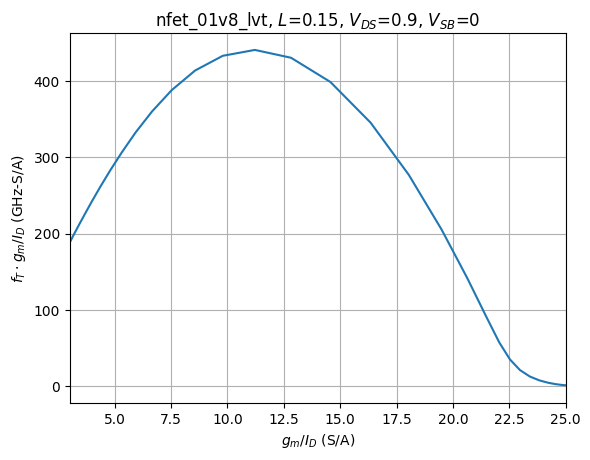

In [36]:
# plot product of gm/ID ant fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

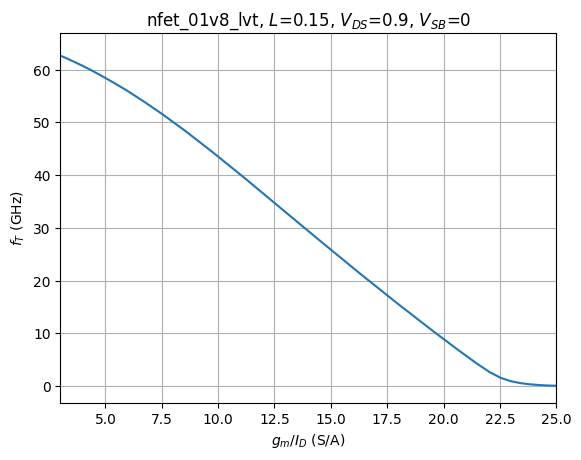

In [37]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

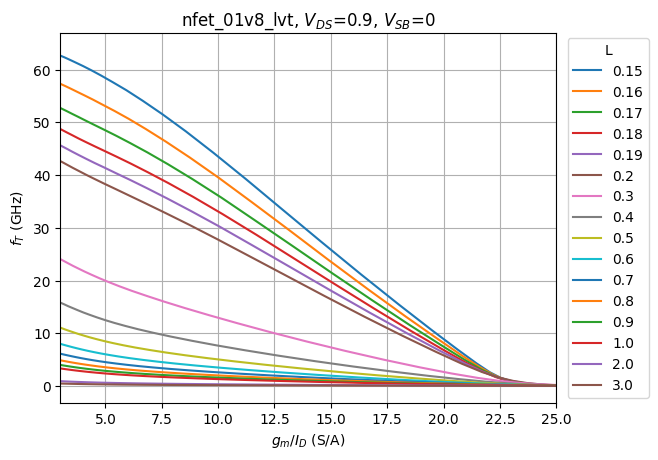

In [38]:
# plot fT versus gm/ID for all L
VDS2=0.9; VSB2=0
gm_id2 = fet.lookup('GM_ID', L=l, VDS=VDS1, VSB=VSB1)
ft2 = fet.lookup('GM_CGG', L=l, VDS=VDS1, VSB=VSB1)/2/np.pi

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), ft2.transpose()/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

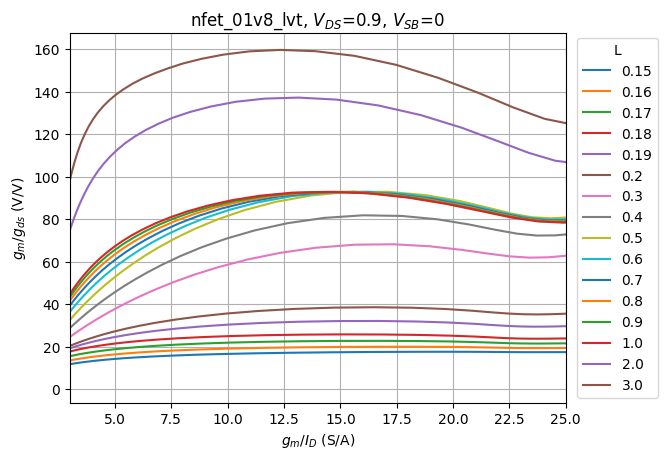

In [39]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = fet.lookup('GM_GDS', L=l, VDS=VDS1, VSB=VSB1)

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), gm_gds2.transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

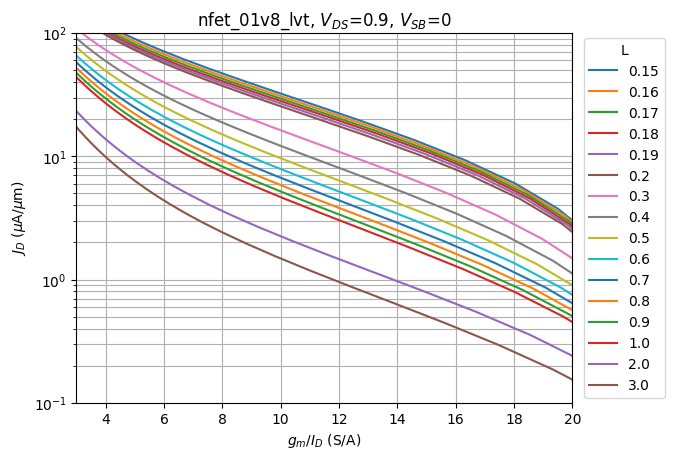

In [40]:
# plot jd versus gm/ID for all L
jd2 = fet.lookup('ID_W', L=l, VDS=VDS1, VSB=VSB1)/1e-6

fig, ax = plt.subplots()
ax.semilogy(gm_id2.transpose(), jd2.transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(1e-1, 1e2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()